In [33]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
arma_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\data\daily\stocks\BATS_CORN, 1D.csv',index_col='time', parse_dates=True)

In [36]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

In [37]:
len(log_diff)

3177

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


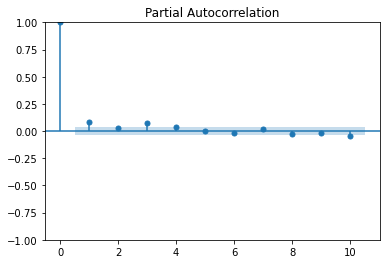

In [38]:
plot_pacf(log_diff, alpha=0.05, lags=10).savefig("pacf.jpg")

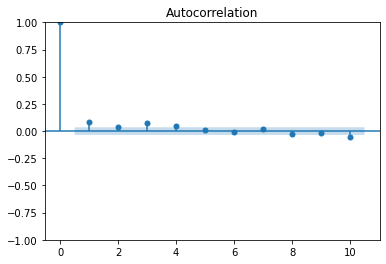

In [39]:
plot_acf(log_diff, alpha=0.05, lags=10).savefig("acf.jpg")

In [40]:
print(len(arma_df))

3178


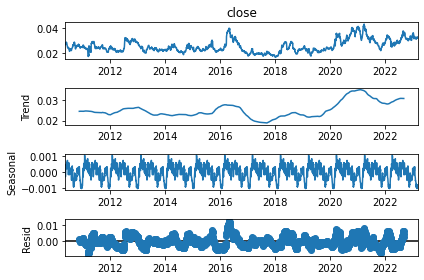

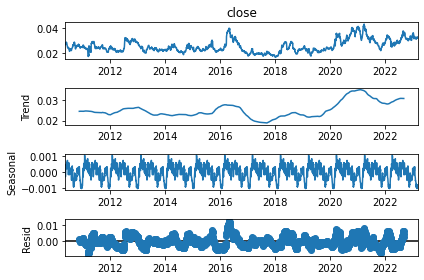

In [41]:
seasonal_result = seasonal_decompose(arma_df['close'], model="additive",period=252)

trend    = seasonal_result.trend
seasonal = seasonal_result.seasonal
residual = seasonal_result.resid

seasonal_result.plot()

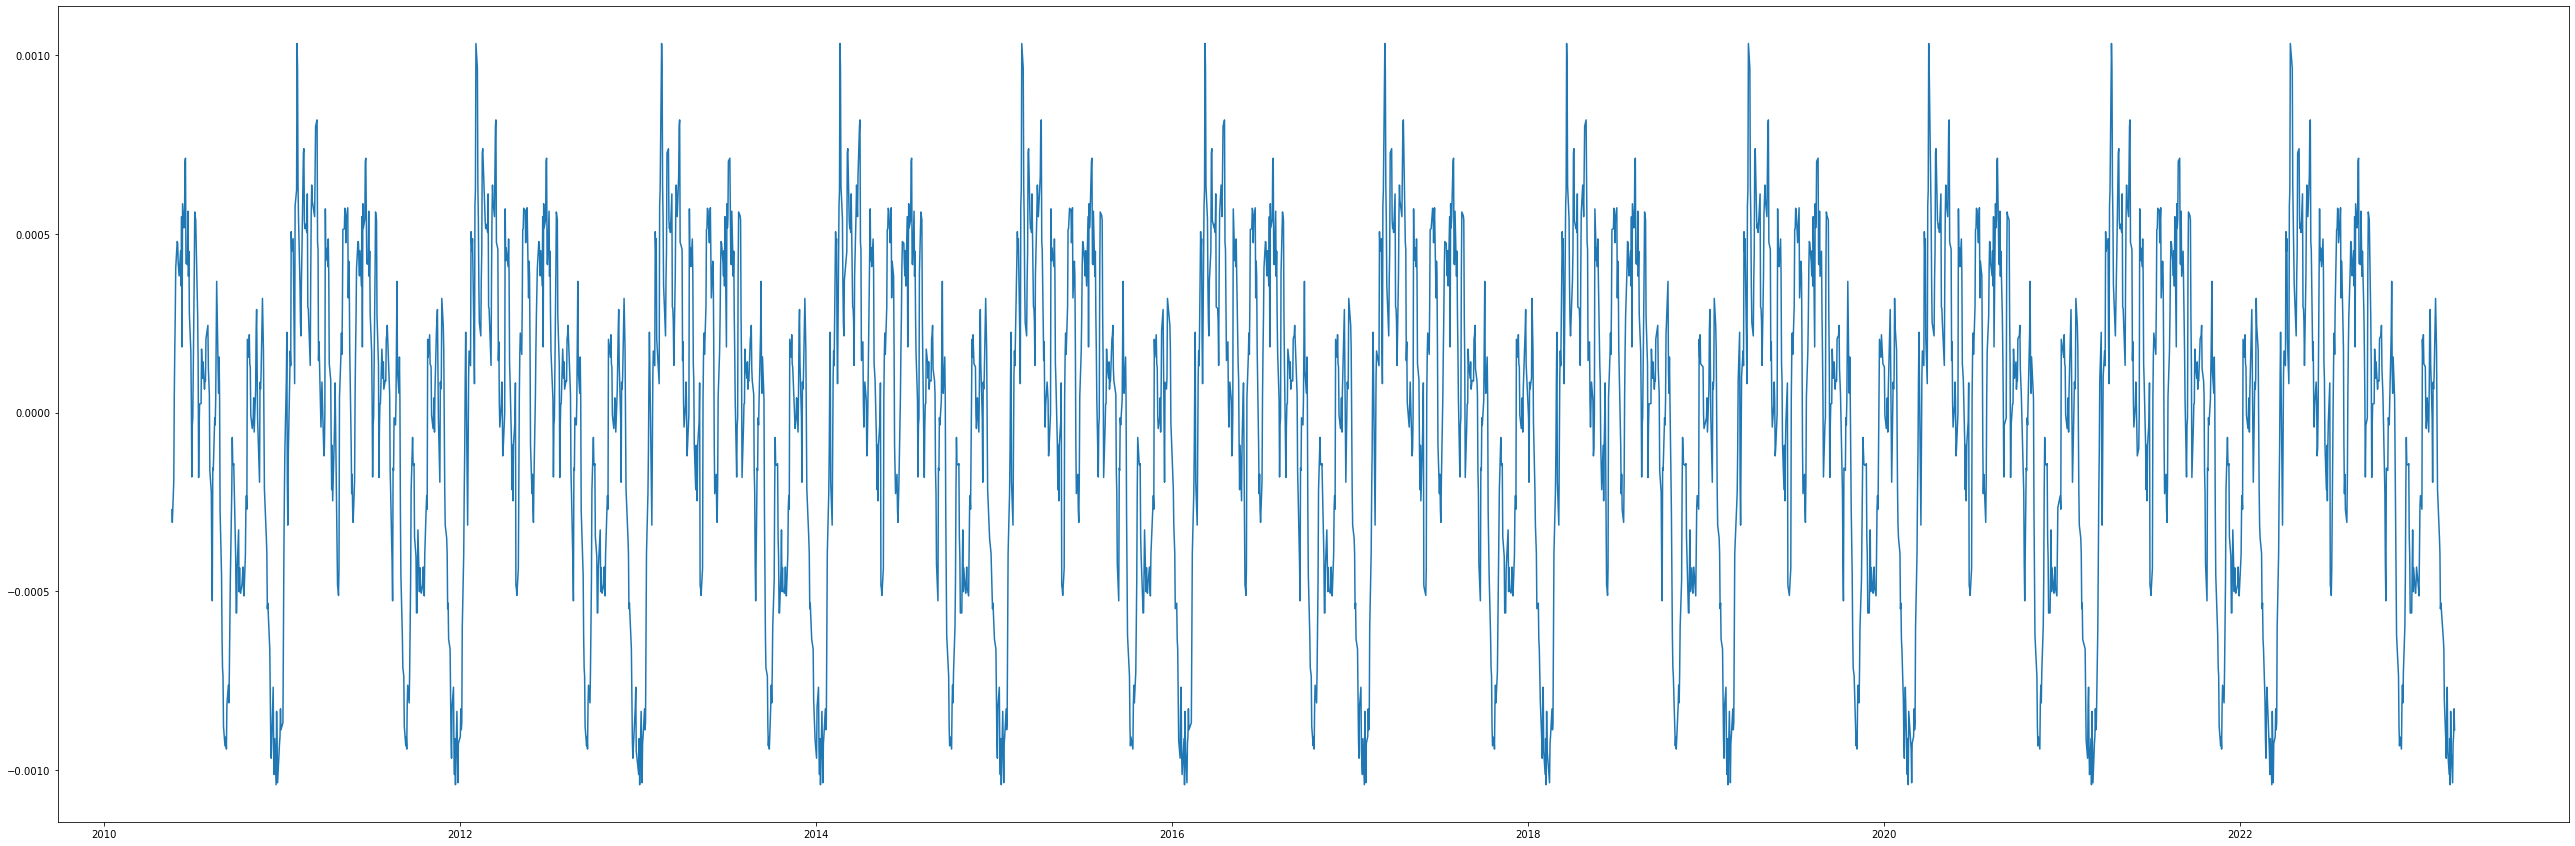

In [42]:
plt.figure(figsize=(45,15))

plt.plot(seasonal)

plt.show()

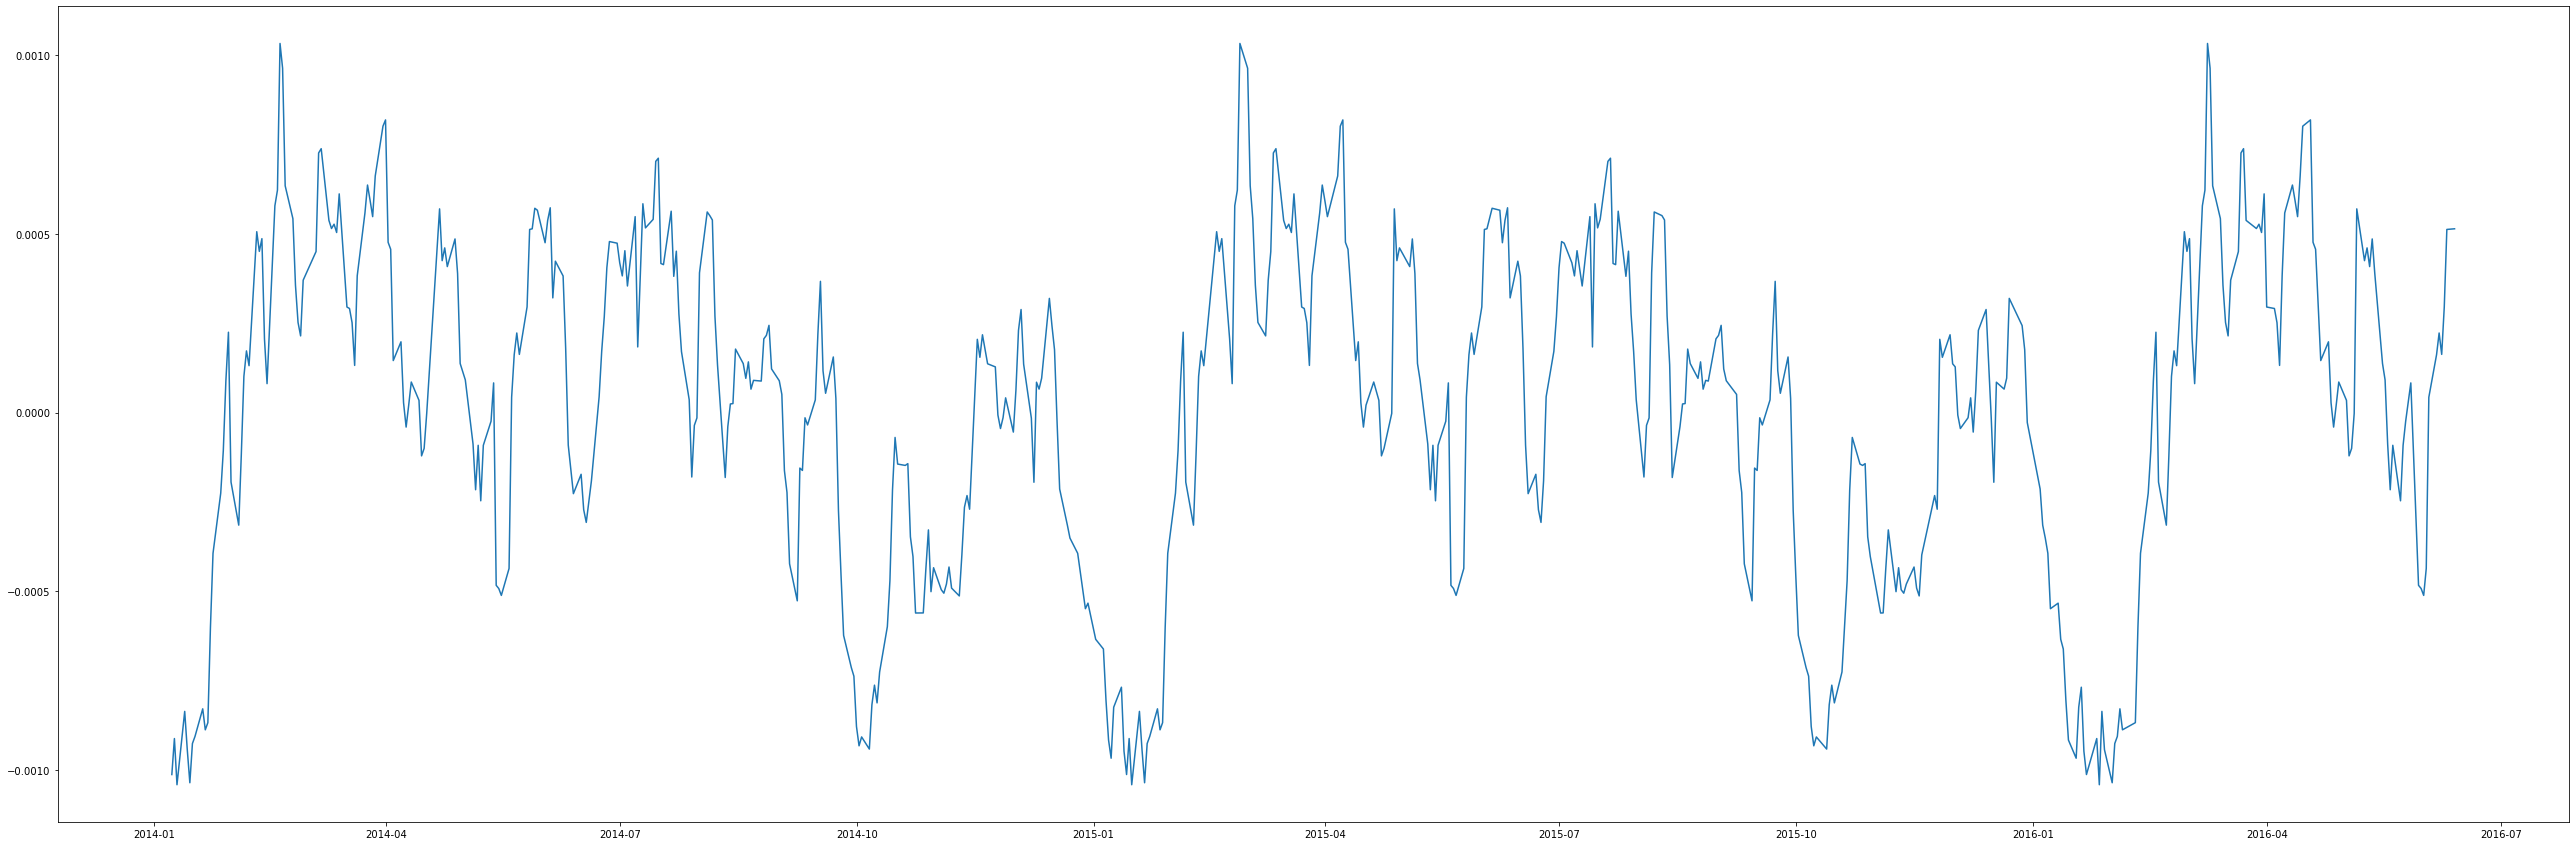

In [43]:
plt.figure(figsize=(45,15))

plt.plot(seasonal[900:1500])

plt.show()

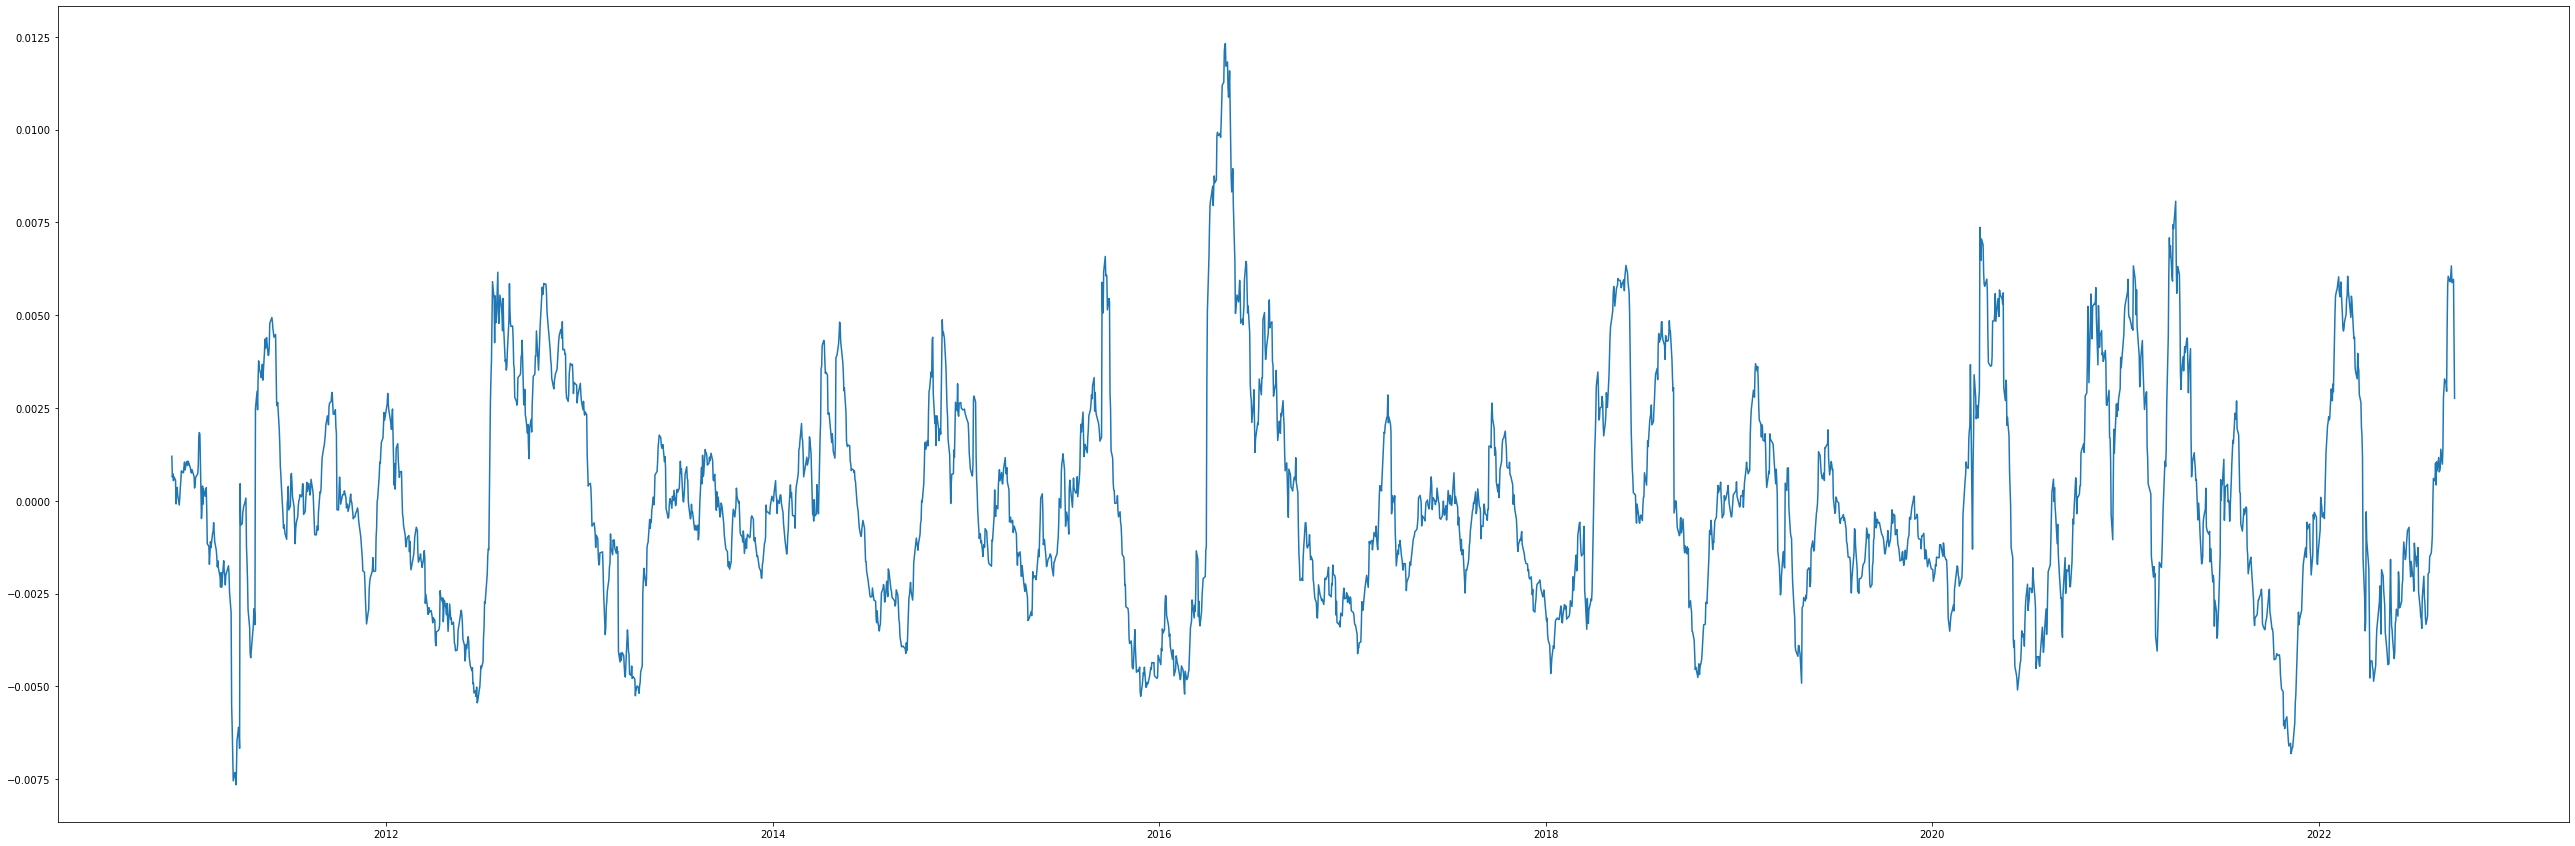

In [44]:
plt.figure(figsize=(45,15))

plt.plot(residual)

plt.show()

In [45]:
log_diff = np.log(arma_df['close']).diff(1).dropna(axis=0)

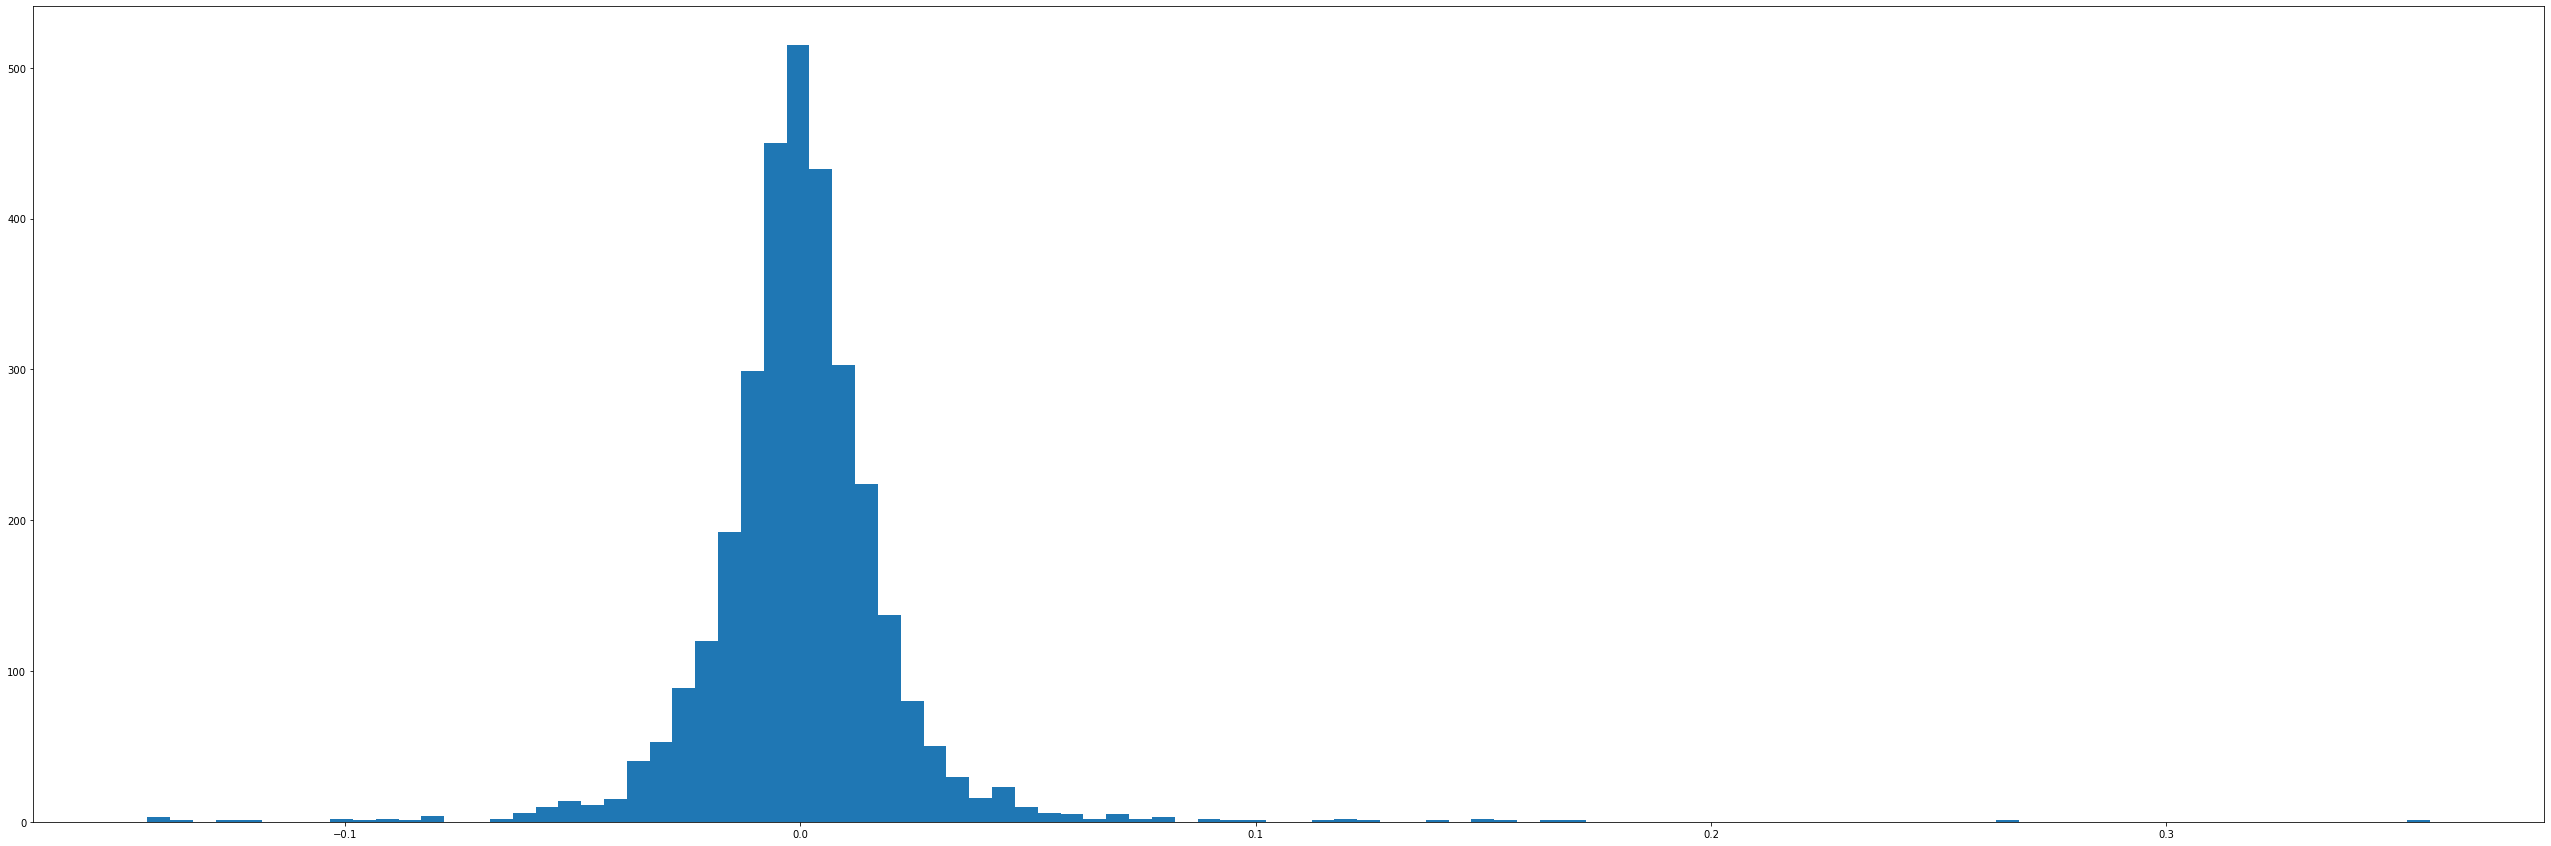

In [46]:
plt.figure(figsize=(45,15))

plt.hist(log_diff,bins=100)

plt.show()

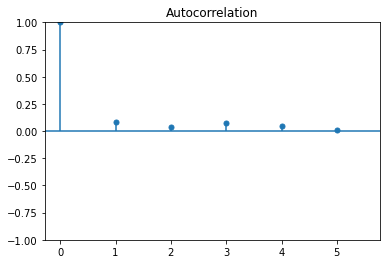

In [47]:
plot_acf(log_diff, alpha=1, lags=5).savefig("acf.jpg")

c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


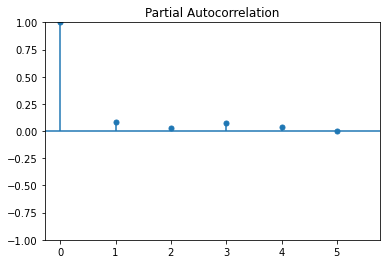

In [48]:
plot_pacf(log_diff, alpha=1, lags=5).savefig("pacf.jpg")